In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import pandas as pd
from sklearn import datasets
import tempfile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
 test_data_home = tempfile.mkdtemp()

In [3]:
 #as this was not working fetch_mldata('MNIST', data_home=test_data_home) so using digit data

In [4]:
digits=datasets.load_digits()

In [5]:
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])

In [6]:
df=df.rename(index=str, columns={64: "label"})


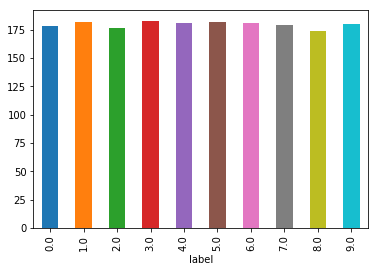

In [7]:
df.groupby('label')[0].count().plot.bar()
plt.show()

In [8]:
y = df.label.values
X = df.drop('label',axis=1).values
X_std = StandardScaler().fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1234)

In [10]:
model=LogisticRegression()

In [11]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_pred=model.predict(X_test)

In [13]:
probs = model.predict_proba(X_test)

In [14]:
print(metrics.accuracy_score(y_test, y_pred))

0.9518518518518518


In [17]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[47  0  0  0  0  0  0  0  0  0]
 [ 0 54  1  0  0  0  1  0  0  0]
 [ 0  0 53  0  0  0  0  1  0  0]
 [ 0  0  0 55  0  1  0  0  0  0]
 [ 0  1  0  0 63  0  0  1  1  0]
 [ 0  0  0  0  0 58  1  0  0  2]
 [ 1  1  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 1  3  1  1  0  0  1  1 38  1]
 [ 0  0  0  0  0  1  0  1  3 46]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        47
         1.0       0.92      0.96      0.94        56
         2.0       0.96      0.98      0.97        54
         3.0       0.98      0.98      0.98        56
         4.0       1.00      0.95      0.98        66
         5.0       0.97      0.95      0.96        61
         6.0       0.94      0.96      0.95        52
         7.0       0.93      1.00      0.96        50
         8.0       0.90      0.81      0.85        47
         9.0       0.94      0.90      0.92        51

   micro avg       0.95      0.95      0.95       540
   macro avg       